In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
birth = np.loadtxt( '../data/births.txt', delimiter=',', dtype=np.int64)
birth

array([[   1880,   90993,  110491],
       [   1881,   91954,  100745],
       [   1882,  107850,  113688],
       [   1883,  112321,  104629],
       [   1884,  129022,  114445],
       [   1885,  133055,  107800],
       [   1886,  144535,  110784],
       [   1887,  145982,  101414],
       [   1888,  178627,  120853],
       [   1889,  178366,  110584],
       [   1890,  190377,  111025],
       [   1891,  185482,  101196],
       [   1892,  212346,  122037],
       [   1893,  212906,  112317],
       [   1894,  222922,  115772],
       [   1895,  233630,  117398],
       [   1896,  237920,  119570],
       [   1897,  234202,  112758],
       [   1898,  258770,  122693],
       [   1899,  233023,  106212],
       [   1900,  299828,  150499],
       [   1901,  239348,  106471],
       [   1902,  264077,  122659],
       [   1903,  261973,  119234],
       [   1904,  275371,  128125],
       [   1905,  291629,  132319],
       [   1906,  295303,  133159],
       [   1907,  318566,  1

In [3]:
birthDF = pd.read_csv('../data/births.txt', header=None, index_col=0)
birthDF.columns = ['남아수', '여아수']
birthDF.index.name = '년도'
birthDF

,남아수,여아수
년도,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


# 1. 남아, 여아 출생 평균을 구하시오.

In [4]:
# 넘파이

print('남아 출생 평균 : ', birth[:,1].mean().round(2))
print('여아 출생 평균 : ', birth[:,2].mean().round(2))

남아 출생 평균 :  1225776.07
여아 출생 평균 :  1245399.21


In [5]:
# 데이터프레임

print('남아 출생 평균 : ', round(birthDF['남아수'].mean(), 2))
print('여아 출생 평균 : ', round(birthDF['여아수'].mean(), 2))

남아 출생 평균 :  1225776.07
여아 출생 평균 :  1245399.21


# 2. 2000년대 이후 데이터를 구하시오.

<pre>
 년도   남아   여아
====================
 2000    xx     xx
</pre>

In [6]:
# 넘파이

birth[birth[:,0]>=2000]

print('년도', '남아', '여아', sep='\t')
print('='*20)
for a, b, c in birth[birth[:,0]>=2000]:
    print(a, b, c)

년도	남아	여아
2000 1814601 1962406
2001 1799049 1941251
2002 1795206 1939815
2003 1825359 1973434
2004 1834145 1982794
2005 1845379 1994841
2006 1898463 2052377
2007 1919408 2072139
2008 1887234 2036289
2009 1832925 1979303
2010 1772738 1913851
2011 1753500 1893230


In [7]:
# 데이터프레임

birthDF[birthDF.index>=2000]

print('년도', '남아', '여아', sep='\t')
print('='*20)
for i, sr in birthDF[birthDF.index>=2000].iterrows():
    print(i, sr[0], sr[1])

년도	남아	여아
2000 1814601 1962406
2001 1799049 1941251
2002 1795206 1939815
2003 1825359 1973434
2004 1834145 1982794
2005 1845379 1994841
2006 1898463 2052377
2007 1919408 2072139
2008 1887234 2036289
2009 1832925 1979303
2010 1772738 1913851
2011 1753500 1893230


# 3. 남아출생이 가장 많은 년도와 남아수를 구하시오.

In [8]:
# 넘파이

boys_1 = birth[birth[:, 1] == birth[:, 1].max()][:, 0:2]

for a, b in boys_1:
    print('남아 출생이 가장 많은 년도 :', a)
    print('남아 출생이 가장 많은 년도의 남아수 :', b)

남아 출생이 가장 많은 년도 : 1957
남아 출생이 가장 많은 년도의 남아수 : 2044160


In [9]:
# 데이터프레임

birthDF.nlargest(1, columns='남아수')

,남아수,여아수
년도,,
1957,2044160,2155866


# 4. 남아출생이 가장 많은 top5를 구하시오. (년도와 남아수)

In [10]:
# 넘파이

In [11]:
np.argsort( birth[:,1] )
birth[ np.argsort( birth[:,1] ) ][-1:-6:-1][:, [0,1] ]

array([[   1957, 2044160],
       [   1959, 2023044],
       [   1960, 2022093],
       [   1961, 2017316],
       [   1958, 2010884]], dtype=int64)

In [12]:
# 데이터프레임

In [13]:
birthDF.nlargest(5, columns='남아수')['남아수']

년도
1957    2044160
1959    2023044
1960    2022093
1961    2017316
1958    2010884
Name: 남아수, dtype: int64

# 5. 남아율(%)을 구하고 년도별 남아수가 차지하는 비율을 데이터로 보여주시오.

<pre>
남아    여아    남아율
======================
..
</pre>

In [14]:
# 넘파이

boys = birth[:,1]
girls = birth[:,2]
boys_ratio = (birth[:,1] / birth.sum(axis=1))*100
boys_ratio.round(2)
print('남아', '여아', '남아율', sep='\t')
print('='*30)


for a, b, c in zip(boys, girls, boys_ratio.round(2)):
    print(a, b, c, sep='\t')

남아	여아	남아율
90993	110491	44.74
91954	100745	47.26
107850	113688	48.27
112321	104629	51.33
129022	114445	52.59
133055	107800	54.81
144535	110784	56.19
145982	101414	58.56
178627	120853	59.27
178366	110584	61.33
190377	111025	62.77
185482	101196	64.28
212346	122037	63.15
212906	112317	65.09
222922	115772	65.45
233630	117398	66.2
237920	119570	66.2
234202	112758	67.13
258770	122693	67.5
233023	106212	68.31
299828	150499	66.3
239348	106471	68.83
264077	122659	67.95
261973	119234	68.38
275371	128125	67.93
291629	132319	68.48
295303	133159	68.62
318566	146833	68.17
334313	154344	68.15
347228	163999	67.67
396501	194218	66.91
418299	225968	64.73
558103	429945	56.38
624518	512557	54.83
761548	654762	53.7
983874	848603	53.63
1044323	890099	53.93
1081280	925511	53.83
1157647	1013537	53.27
1130145	980149	53.51
1198283	1064463	52.91
1232999	1101457	52.77
1200919	1088287	52.42
1206330	1096168	52.35
1248876	1132751	52.4
1217352	1115958	52.13
1185304	1110505	51.59
1192330	1126717	51.37
1153117	1107518	5

In [15]:
# 데이터프레임

birthDF['남아율'] = round((birthDF['남아수'] / birthDF.sum(axis=1))*100, 2)

print('남아', '여아', '남아율', sep='\t\t')
print('='*40)
for i, sr in birthDF.iterrows():
    print(sr['남아수'], sr['여아수'], sr['남아율'], sep='\t')

남아		여아		남아율
90993.0	110491.0	45.16
91954.0	100745.0	47.72
107850.0	113688.0	48.68
112321.0	104629.0	51.77
129022.0	114445.0	52.99
133055.0	107800.0	55.24
144535.0	110784.0	56.61
145982.0	101414.0	59.01
178627.0	120853.0	59.65
178366.0	110584.0	61.73
190377.0	111025.0	63.16
185482.0	101196.0	64.7
212346.0	122037.0	63.5
212906.0	112317.0	65.46
222922.0	115772.0	65.82
233630.0	117398.0	66.56
237920.0	119570.0	66.55
234202.0	112758.0	67.5
258770.0	122693.0	67.84
233023.0	106212.0	68.69
299828.0	150499.0	66.58
239348.0	106471.0	69.21
264077.0	122659.0	68.28
261973.0	119234.0	68.72
275371.0	128125.0	68.25
291629.0	132319.0	68.79
295303.0	133159.0	68.92
318566.0	146833.0	68.45
334313.0	154344.0	68.41
347228.0	163999.0	67.92
396501.0	194218.0	67.12
418299.0	225968.0	64.93
558103.0	429945.0	56.49
624518.0	512557.0	54.92
761548.0	654762.0	53.77
983874.0	848603.0	53.69
1044323.0	890099.0	53.99
1081280.0	925511.0	53.88
1157647.0	1013537.0	53.32
1130145.0	980149.0	53.55
1198283.0	1064463.0	52.96
12

# 6. 2000년도 이후 데이터에 대해 출생량 을 구하고,
# 남아수가 1800000 이상이면 '많음' 아니면 '적음'이라고 보여 주시오.

<pre>
	남아수 출생량
2000   1233   '많음'
2001   1234   '적음'
</pre>

In [16]:
# 넘파이

aft_2000 = birth [ birth[:,0] >= 2000 ]
boys    = aft_2000[:,1]
amount  = np.where( aft_2000[:,1] >= 1800000 , '많음', '적음')
aft_2000 = birth [ birth[:,0] >= 2000 ]
for year, boy, amt in zip( aft_2000[:,0],aft_2000[:,1], amount):
    print(year, boy, amt)

2000 1814601 많음
2001 1799049 적음
2002 1795206 적음
2003 1825359 많음
2004 1834145 많음
2005 1845379 많음
2006 1898463 많음
2007 1919408 많음
2008 1887234 많음
2009 1832925 많음
2010 1772738 적음
2011 1753500 적음


In [17]:
# 데이터프레임

y2000 = birthDF.loc[2000:]
y2000['출생량'] = y2000['남아수'].apply( lambda v: '많음' if v>=1800000 else '적음')
y2000

<ipython-input-17-3a460d718f03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2000['출생량'] = y2000['남아수'].apply( lambda v: '많음' if v>=1800000 else '적음')


,남아수,여아수,남아율,출생량
년도,,,,
2000,1814601,1962406,48.04,많음
2001,1799049,1941251,48.10,적음
2002,1795206,1939815,48.06,적음
2003,1825359,1973434,48.05,많음
2004,1834145,1982794,48.05,많음
2005,1845379,1994841,48.05,많음
2006,1898463,2052377,48.05,많음
2007,1919408,2072139,48.09,많음
2008,1887234,2036289,48.10,많음


# 7. 1800년대, 1900년대, 2000년대 각 남아, 여야수 평균을 구하시오.

In [18]:
# 넘파이

print(birth[(birth[:,0] >= 1800)&(birth[:,0]< 1900)][:,1].mean())
print(birth[(birth[:,0] >= 1800)&(birth[:,0]< 1900)][:,2].mean())
print(birth[(birth[:,0] >= 1900)&(birth[:,0]< 2000)][:,1].mean())
print(birth[(birth[:,0] >= 1900)&(birth[:,0]< 2000)][:,2].mean())
print(birth[birth[:,0]>=2000][:,1].mean())
print(birth[birth[:,0]>=2000][:,2].mean())

176714.15
111820.55
1362901.51
1384145.55
1831500.5833333333
1978477.5


In [19]:
# 데이터프레임

print(birthDF[(birthDF.index >= 1800)&(birthDF.index < 1900)]['남아수'].mean())
print(birthDF[(birthDF.index >= 1800)&(birthDF.index < 1900)]['여아수'].mean())
print(birthDF[(birthDF.index >= 1900)&(birthDF.index < 2000)]['남아수'].mean())
print(birthDF[(birthDF.index >= 1900)&(birthDF.index < 2000)]['여아수'].mean())
print(birthDF[(birthDF.index >= 2000)]['남아수'].mean())
print(birthDF[(birthDF.index >= 2000)]['여아수'].mean())

176714.15
111820.55
1362901.51
1384145.55
1831500.5833333333
1978477.5


# 8. 여아 25%~75% 사이의 값을 구하시오.

In [20]:
# 넘파이

arr_girls = birth[:,2]

np.quantile(arr_girls, [0.25, 0.75])

array([ 491904. , 1904686.5])

In [21]:
# 데이터프레임

birthDF['여아수'].quantile([0.25, 0.75])

0.25     491904.0
0.75    1904686.5
Name: 여아수, dtype: float64

# 9. 2000년대 남아데이터를 바차트로 그리시오.

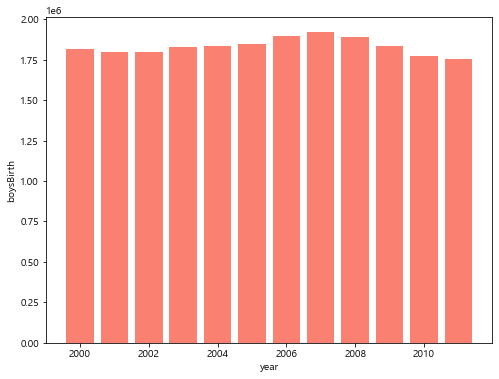

In [22]:
# 넘파이
boys_2000s = birth[ birth[:,0] >= 2000 ][:,0:2]

plt.bar( boys_2000s[:,0] ,boys_2000s[:,1], color='salmon')
plt.xlabel('year')
plt.ylabel('boysBirth')
plt.show()

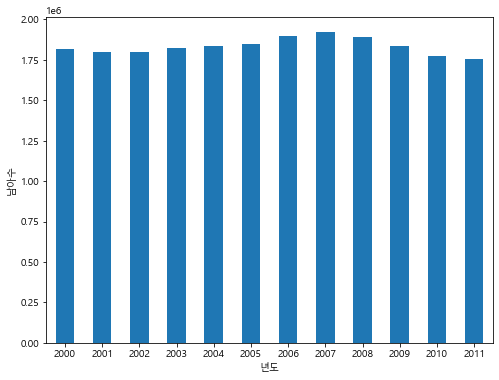

In [23]:
# 데이터프레임

birthDF[birthDF.index>=2000]['남아수'].plot(kind='bar', rot=0)
plt.ylabel('남아수')
plt.show()